# The pendulum

<img src="pendulum.png">

## Equations of Motion

\begin{eqnarray*}
\frac{d \theta}{dt} =& \omega \\
\frac{d \omega}{dt} =& - \frac{g}{l} sin (\theta)
\end{eqnarray*}

## Modes of motion of a pendulum

In [1]:
from IPython.display import Video

In [2]:
Video("pendulum_positions.mp4", width=800, height=400)

In [3]:
Video("pendulum_phase_space.mp4", width=800, height=400)

## Phase space portrait

In [4]:
%matplotlib inline

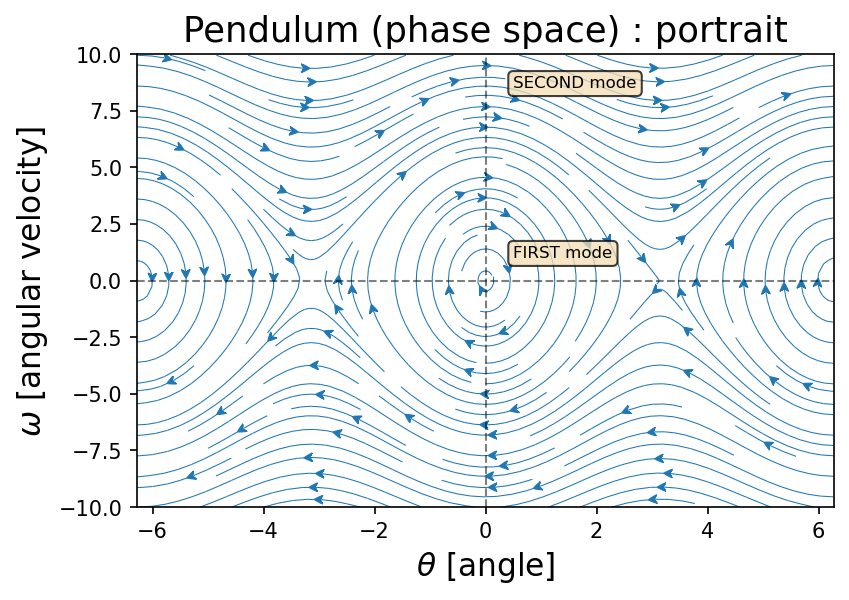

In [5]:
import pylab
import numpy as np
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1,dpi=150)

# system parameters
mass, gravity, length = [1.0, 9.81, 1.0]
PARAMETERS = (mass, gravity, length)

# phase space grid
theta_values = np.arange(-2*np.pi, 2*np.pi, 0.05)
omega_values = np.arange(-10, 10, 0.05) 
THETA, OMEGA = np.meshgrid(theta_values, omega_values)

# equations of motion
v_theta = OMEGA
v_omega = -gravity/length*np.sin(THETA)

# plot streamlines
pylab.streamplot(THETA, OMEGA, v_theta, v_omega, density=1.5, cmap="Blues", linewidth=0.5, arrowstyle='fancy')

# reference lines
ax.plot((-2*np.pi, 2*np.pi),(0,0),color="black",lw=1,linestyle="--",alpha=0.5)
ax.plot((0,0),(-10,10),color="black",lw=1,linestyle="--",alpha=0.5)

# text labels
props = dict(boxstyle='round', facecolor='wheat', alpha=0.75)
ax.text(0.5, 1,"FIRST mode",bbox = props, fontsize=8)
ax.text(0.5, 8.5,"SECOND mode",bbox = props, fontsize=8)

# customise plot
ax.set_xlim(-2*np.pi, 2*np.pi)
ax.set_ylim(-10,10)
ax.set_xlabel("$\\theta$ [angle]", fontsize=15)
ax.set_ylabel("$\omega$ [angular velocity]", fontsize=15)
ax.set_title("Pendulum (phase space) : portrait", fontsize=17)
ax.grid(False)

plt.show()

# The method of Lagrangian Descriptors with `LDDS`

## Set equations of motion (vector field)

In [6]:
import numpy as np

def pendulum_vector_field(t, u, PARAMETERS = [1.0, 9.81, 1.0]):
    # unpack state variables
    x, p_x = u.T
    
    # system parameters
    mass, gravity, length = PARAMETERS
    
    # vector field components
    v_x   =  p_x / length**2
    v_p_x = -gravity*length*np.sin(x)
    v = np.column_stack([
        v_x, 
        v_p_x
    ])
    
    # output vector field
    return v

In [7]:
vector_field = pendulum_vector_field

## Define visualisation grid

In [8]:
# theta axis limits
ax1_min, ax1_max = [-2*np.pi, 2*np.pi] 

# p_theta axis limits
ax2_min, ax2_max = [-10, 10] 

# Number of points per axis
N1, N2 = [300, 300] 

grid_parameters = [(ax1_min, ax1_max, N1), (ax2_min, ax2_max, N2)]

## Set integration parameters of Lagrangian descriptor

In [9]:
# Integration parameters
tau = 12

# LDp, p-value
p_value = 0.5

## Compute Lagrangian descriptor

In [10]:
from ldds.base import compute_lagrangian_descriptor

In [11]:
LD = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)

## Visualise Lagrangian descriptor

In [12]:
from ldds.tools import draw_all_lds

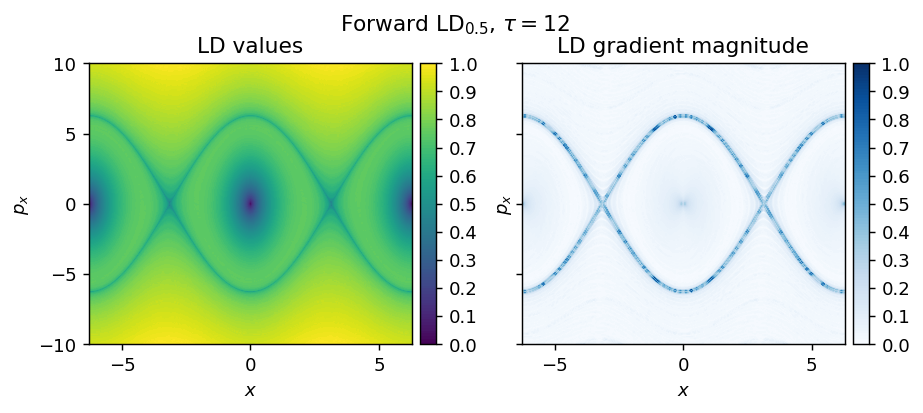

In [13]:
figs = draw_all_lds(LD, [], grid_parameters, tau, p_value)

## Customise plot

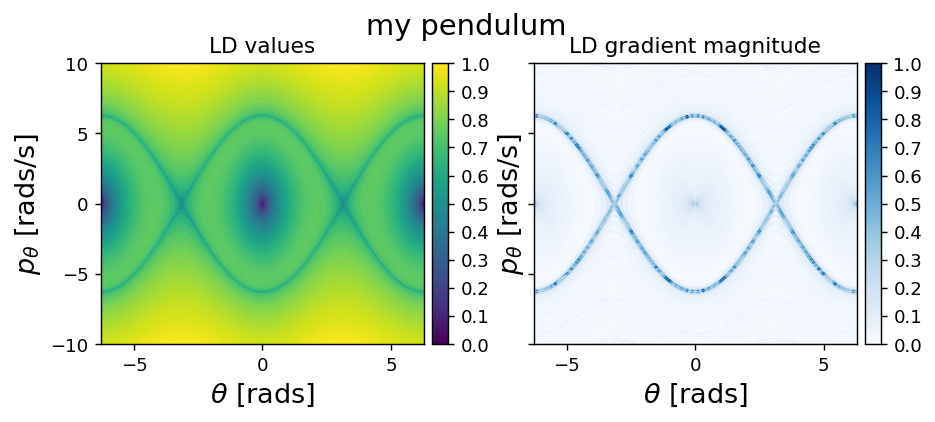

In [14]:
# choose LD forwards subplots
fig, ax = figs[0]

# set new axes labels
ax[0].set_xlabel(r"$\theta$ [rads]", fontsize=15)
ax[0].set_ylabel(r"$p_\theta$ [rads/s]", fontsize=15)

ax[1].set_xlabel(r"$\theta$ [rads]", fontsize=15)
ax[1].set_ylabel(r"$p_\theta$ [rads/s]", fontsize=15)

# set new super-title
suptitle = "my pendulum"
fig.suptitle(suptitle, fontsize=16)

# visualise
fig

## Putting all together

In [15]:
from scipy.ndimage import laplace
from numpy.ma import masked_where
from numpy.ma import masked_array

def LD_laplace_filter(LD, tolerance):
    LD_laplacian = laplace(LD)
    #process laplacian 
    LD_laplacian = LD_laplacian/np.max(LD_laplacian)
    LD_laplacian = LD_laplacian**2
    #mask values according to threshold
    LD_laplacian = masked_where(LD_laplacian < tolerance, LD_laplacian)
    
    return LD_laplacian

In [16]:
%matplotlib inline

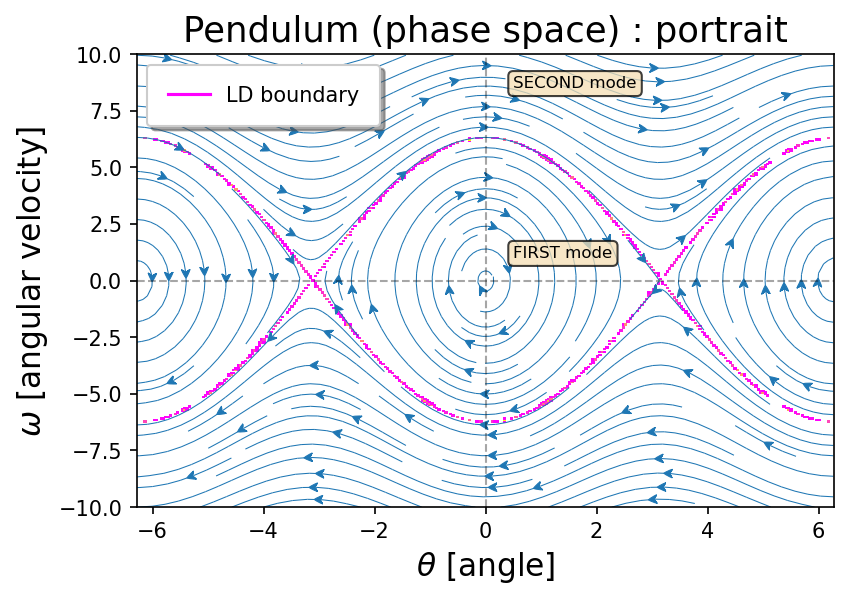

In [17]:
import pylab
import numpy as np
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1,dpi=150)

# system parameters
mass, gravity, length = [1.0, 9.81, 1.0]
PARAMETERS = (mass, gravity, length)

# phase space grid
theta_values = np.arange(-2*np.pi, 2*np.pi, 0.05)
omega_values = np.arange(-10, 10, 0.05) 
THETA, OMEGA = np.meshgrid(theta_values, omega_values)

# equations of motion
v_theta = OMEGA
v_omega = -gravity/length*np.sin(THETA)

# plot streamlines
pylab.streamplot(THETA, OMEGA, v_theta, v_omega, 
                 density=1.5, cmap="Blues", linewidth=0.5, 
                 arrowstyle='fancy')

# reference lines
ax.plot((-2*np.pi, 2*np.pi),(0,0),color="black",lw=1,linestyle="--",alpha=0.35)
ax.plot((0,0),(-10,10),color="black",lw=1,linestyle="--",alpha=0.35)

# Overlay separatrix from LD
tolerance = 0.03
LD_laplacian = LD_laplace_filter(LD, tolerance)
points_ax1 = np.linspace(*grid_parameters[0])
points_ax2 = np.linspace(*grid_parameters[1])
X, Y = np.meshgrid(points_ax1, points_ax2)
ax.pcolormesh(X,Y, LD_laplacian,cmap='spring',alpha=1)

# text labels
props = dict(boxstyle='round', facecolor='wheat', alpha=0.75)
ax.text(0.5, 1,"FIRST mode",bbox = props, fontsize=8)
ax.text(0.5, 8.5,"SECOND mode",bbox = props, fontsize=8)
ax.plot([],[],color="magenta",label="LD boundary")

# customise plot
ax.set_xlim(-2*np.pi, 2*np.pi)
ax.set_ylim(-10,10)
ax.set_xlabel("$\\theta$ [angle]", fontsize=15)
ax.set_ylabel("$\omega$ [angular velocity]", fontsize=15)
ax.set_title("Pendulum (phase space) : portrait", fontsize=17)
ax.grid(False)

ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()

# `LDDS`

* Main modules

* Readable and Modularity

* Help 

In [29]:
import ldds.vector_fields
help(ldds.vector_fields.DoubleGyre)

Help on function DoubleGyre in module ldds.vector_fields:

DoubleGyre(t, u, PARAMETERS=[0, 0.25, 6.283185307179586, 0, 0, 1, 0.25])
    Returns 2D Double Gyre vector field at time t, for an array of points in phase space.
    Number of model parameters: 6 . PARAMETERS = [phase_shift, A, phi, psi, mu, s, epsilon]
    Functional form: 
    
    vx = -pi*A*sin(pi*f(t + phase_shift, x)/s)*cos(pi*y/s) - mu*x
    vy =  pi*A*cos(pi*f(t + phase_shift, x)/s)*sin(pi*y/s)*df(t + phase_shift,x)/dx - mu*y
    
    with
    
    f(t, x)    = epsilon*sin(phi*t + psi)*x**2 + (1 - 2*epsilon*sin(phi*t + psi))*x
    df/dx(t,x) = 2*epsilon*sin(phi*t + psi)*x + (1 - 2*epsilon*sin(phi*t + psi))
    u = (x, y)
    Parameters
    ----------
    t : float
        fixed time-point of vector field, for all points in phase space.
    u : array_like, shape(n,)
        points in phase space to determine vector field at time t.
    PARAMETERS : list of floats
        vector field parameters
    Returns
    -------
 

* [Tutorials](https://github.com/champsproject/ldds/tree/develop/tutorials)



* [Documentation](https://ldds.readthedocs.io/en/latest/?badge=latest#)

* Reproducible research